In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt

In [2]:
sample_num = 1000
sample_rate = 0.8
data_split = int(sample_num * sample_rate)

In [3]:
x, y = make_classification(
    n_samples=sample_num,
    n_features=2,
    n_redundant=0,
    n_informative=1,
    n_clusters_per_class=1
)

In [4]:
x.shape, y.shape

((1000, 2), (1000,))

In [5]:
x_data_train = x[:data_split, :]
x_data_test = x[data_split:, :]
y_data_train = y[:data_split]
y_data_test = y[data_split:]

In [6]:
x_data_train.shape, x_data_test.shape

((800, 2), (200, 2))

In [7]:
positive_x1 = [x[i, 0] for i in range(sample_num) if y[i] == 1]
positive_x2 = [x[i, 1] for i in range(sample_num) if y[i] == 1]
negative_x1 = [x[i, 0] for i in range(sample_num) if y[i] == 0]
negative_x2 = [x[i, 1] for i in range(sample_num) if y[i] == 0]

In [8]:
len(positive_x1)

497

In [9]:
clf = Perceptron(fit_intercept=True, n_iter_no_change=30, shuffle=False)

In [10]:
clf.fit(x_data_train, y_data_train)

Perceptron(n_iter_no_change=30, shuffle=False)

In [11]:
print('Coef Matrix:', clf.coef_)

Coef Matrix: [[-1.28148398  4.23100344]]


In [12]:
print('Intercept:', clf.intercept_)

Intercept: [1.]


In [13]:
acc = clf.score(x_data_test, y_data_test)

In [14]:
print('ACC:', acc)

ACC: 0.94


(-3.834705311802318, 3.7398231556370836)

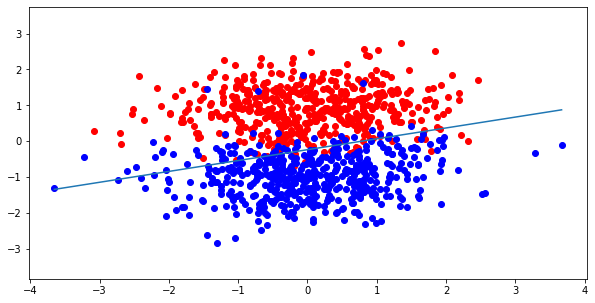

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(positive_x1, positive_x2, c='red')
plt.scatter(negative_x1, negative_x2, c='blue')

line_x = np.array([x.min(0)[0], x.max(0)[0]])
line_y = - (line_x * clf.coef_[0][0] + clf.intercept_) / clf.coef_[0][1]
plt.plot(line_x, line_y)
plt.ylim(x.min(0)[1] - 1, x.max(0)[1] + 1)

In [16]:
num = 50
x = np.vstack((
    np.random.randn(num, 2) + 6, np.random.randn(num, 2) + 2
))
y = np.hstack((
    np.ones(num), - np.ones(num)
))

In [17]:
x, y

(array([[ 3.99141923,  6.60429499],
        [ 6.47839946,  5.45336171],
        [ 6.54965234,  5.26432043],
        [ 5.39270443,  7.04782662],
        [ 5.96819206,  5.53937434],
        [ 6.16815663,  6.24403701],
        [ 7.09276469,  6.24782601],
        [ 6.52099238,  5.16439152],
        [ 7.5537107 ,  6.82545095],
        [ 6.94974122,  5.50167745],
        [ 5.69878281,  5.56241557],
        [ 6.45031578,  5.88487342],
        [ 6.89926623,  5.473085  ],
        [ 6.13695081,  7.26819352],
        [ 6.79644534,  6.90335017],
        [ 6.37986068,  5.49393598],
        [ 5.79030037,  6.30477188],
        [ 5.17258904,  6.29802973],
        [ 6.46970318,  5.99861847],
        [ 5.92134677,  8.01179035],
        [ 5.23690118,  6.32104542],
        [ 6.3170309 ,  4.19356296],
        [ 6.11551017,  6.95447108],
        [ 5.96302544,  5.81543971],
        [ 5.34308058,  5.05067246],
        [ 5.76921609,  5.40221817],
        [ 5.54962438,  6.35278487],
        [ 7.36044174,  5.395

In [20]:
w = [0, 0]
b = 0
lr = 1

In [21]:
for j in range(100):
    wrong_pt_cnt = 0
    for i in range(len(y)):
        if y[i] != np.sign(np.dot(w, x[i]) + b):
            w += lr * y[i] * x[i]
            b += lr * y[i]
            wrong_pt_cnt += 1
    if wrong_pt_cnt == 0:
        break

In [22]:
def draw_pts(x, y):
    for i in range(len(x)):
        if y[i] == 1:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')

In [23]:
def draw_line(w, b):
    line_x = [0, 7]
    line_y = [0, 0]

    for i in range(len(line_x)):
        line_y[i] = (- w[0] * line_x[i] - b) / (w[1] + 1e-9)
    plt.plot(line_x, line_y)

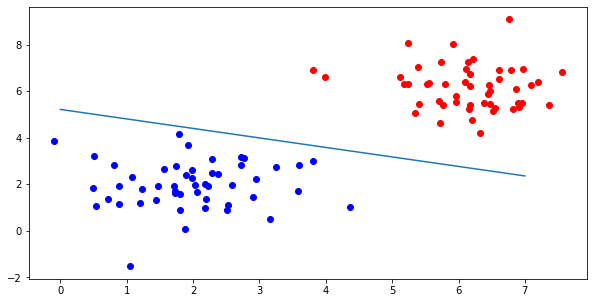

In [24]:
plt.figure(figsize=(10, 5))
draw_pts(x, y)
draw_line(w, b)